In [118]:
# python prerequisities

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
%config Completer.use_jedi = False

sns.set(font_scale=2,
        style="ticks",
        rc={
            "axes.titlesize": 24,
            "axes.labelsize": 20,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20
        })

In [119]:
def readCsv(filename, offset, source, hardware):
    
    run = pd.read_csv(filename, delimiter=",")
    run["time"] = pd.to_datetime(run["time"], infer_datetime_format=True)  + offset
    
    startTime = run.iloc[0]["time"]
    print(startTime)
    
    run["time"] = run["time"] - startTime
    
    # calculate speed
    run['d_distance'] = run['distance'].diff()
    run['d_time'] = run['time'].diff()
    run['speed_calc'] = run['d_distance'] / run['d_time'].dt.total_seconds()
    
    run["speed_rolling_5s"] = run["speed_calc"].rolling(5).mean()
    run["speed_rolling_10s"] = run["speed_calc"].rolling(10).mean()
    run["speed_rolling_15s"] = run["speed_calc"].rolling(15).mean()
    run["source"] = source
    run["hardware"] = hardware
    
    return run


In [120]:
run = {}

# gps+fp
run[1] = {}
run[1]["g"] = readCsv("2-csv/forerunner-82911648.csv", pd.DateOffset(hours=2), "garmin", "gps+footpod")
run[1]["p"] = readCsv("2-csv/polar2021-10-24_18-46-22.csv", pd.DateOffset(months=1, days=-1, hours=0,seconds=28), "polar", "gps+footpod")


# gps only
run[2] = {}
run[2]["g"] = readCsv("2-csv/forerunner-82912399.csv", pd.DateOffset(hours=2), "garmin", "gps")
run[2]["p"] = readCsv("2-csv/polar2021-10-24_18-58-31.csv", pd.DateOffset(months=1, days=-1, hours=0,seconds=23), "polar", "gps")


# fp only
run[3] = {}
run[3]["g"] = readCsv("2-csv/forerunner-82912973.csv", pd.DateOffset(hours=2), "garmin", "footpod")
run[3]["p"] = readCsv("2-csv/polar2021-10-24_19-11-09.csv", pd.DateOffset(months=1, days=-1, hours=0,seconds=23), "polar", "footpod")



run[1]["p"].head(5)

2021-11-23 18:46:51+00:00
2021-11-23 18:46:51+00:00
2021-11-23 18:58:55+00:00
2021-11-23 18:58:55+00:00
2021-11-23 19:11:32+00:00
2021-11-23 19:11:33+00:00


,time,latitude,longitude,distance,cadence,altitude,d_distance,d_time,speed_calc,speed_rolling_5s,speed_rolling_10s,speed_rolling_15s,source,hardware
0,0 days 00:00:00,52.131882,21.071524,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,polar,gps+footpod
1,0 days 00:00:01,52.131882,21.071524,0.0,0.0,NaN,0.0,0 days 00:00:01,0.0,NaN,NaN,NaN,polar,gps+footpod
2,0 days 00:00:02,52.131874,21.071543,0.0,0.0,NaN,0.0,0 days 00:00:01,0.0,NaN,NaN,NaN,polar,gps+footpod
3,0 days 00:00:03,52.131864,21.071573,1.3,0.0,NaN,1.3,0 days 00:00:01,1.3,NaN,NaN,NaN,polar,gps+footpod
4,0 days 00:00:04,52.131856,21.071605,3.3,0.0,NaN,2.0,0 days 00:00:01,2.0,NaN,NaN,NaN,polar,gps+footpod


In [121]:
concatenated = pd.concat([
    run[1]["g"], run[1]["p"], run[2]["g"], run[2]["p"], run[3]["g"],
    run[3]["p"]
],
                         ignore_index=True)

concatenated

,time,latitude,longitude,altitude,distance,hr,speed,d_distance,d_time,speed_calc,speed_rolling_5s,speed_rolling_10s,speed_rolling_15s,source,hardware,cadence
0,0 days 00:00:00,52.131829,21.071362,114.000000,0.000000,87.0,0.000,NaN,NaT,NaN,NaN,NaN,NaN,garmin,gps+footpod,NaN
1,0 days 00:00:01,52.131834,21.071362,114.000000,1.490000,89.0,1.493,1.49,0 days 00:00:01,1.49,NaN,NaN,NaN,garmin,gps+footpod,NaN
2,0 days 00:00:02,52.131837,21.071363,114.000000,3.900000,89.0,2.407,2.41,0 days 00:00:01,2.41,NaN,NaN,NaN,garmin,gps+footpod,NaN
3,0 days 00:00:03,52.131837,21.071374,113.800003,6.740000,89.0,2.837,2.84,0 days 00:00:01,2.84,NaN,NaN,NaN,garmin,gps+footpod,NaN
4,0 days 00:00:04,52.131832,21.071419,113.800003,9.540000,91.0,2.799,2.80,0 days 00:00:01,2.80,NaN,NaN,NaN,garmin,gps+footpod,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,0 days 00:09:30,52.132137,21.071355,107.443000,1722.699951,NaN,NaN,0.00,0 days 00:00:01,0.00,0.17998,0.950000,1.853328,polar,footpod,79.0
3482,0 days 00:09:31,52.132130,21.071361,107.443000,1722.699951,NaN,NaN,0.00,0 days 00:00:01,0.00,0.07998,0.700000,1.566667,polar,footpod,79.0
3483,0 days 00:09:32,52.132123,21.071366,107.748000,1722.699951,NaN,NaN,0.00,0 days 00:00:01,0.00,0.00000,0.489990,1.300000,polar,footpod,0.0
3484,0 days 00:09:33,52.132113,21.071372,107.748000,1722.699951,NaN,NaN,0.00,0 days 00:00:01,0.00,0.00000,0.329993,1.046663,polar,footpod,0.0


Time vs speed
Time vs speed (smooth 5s window)


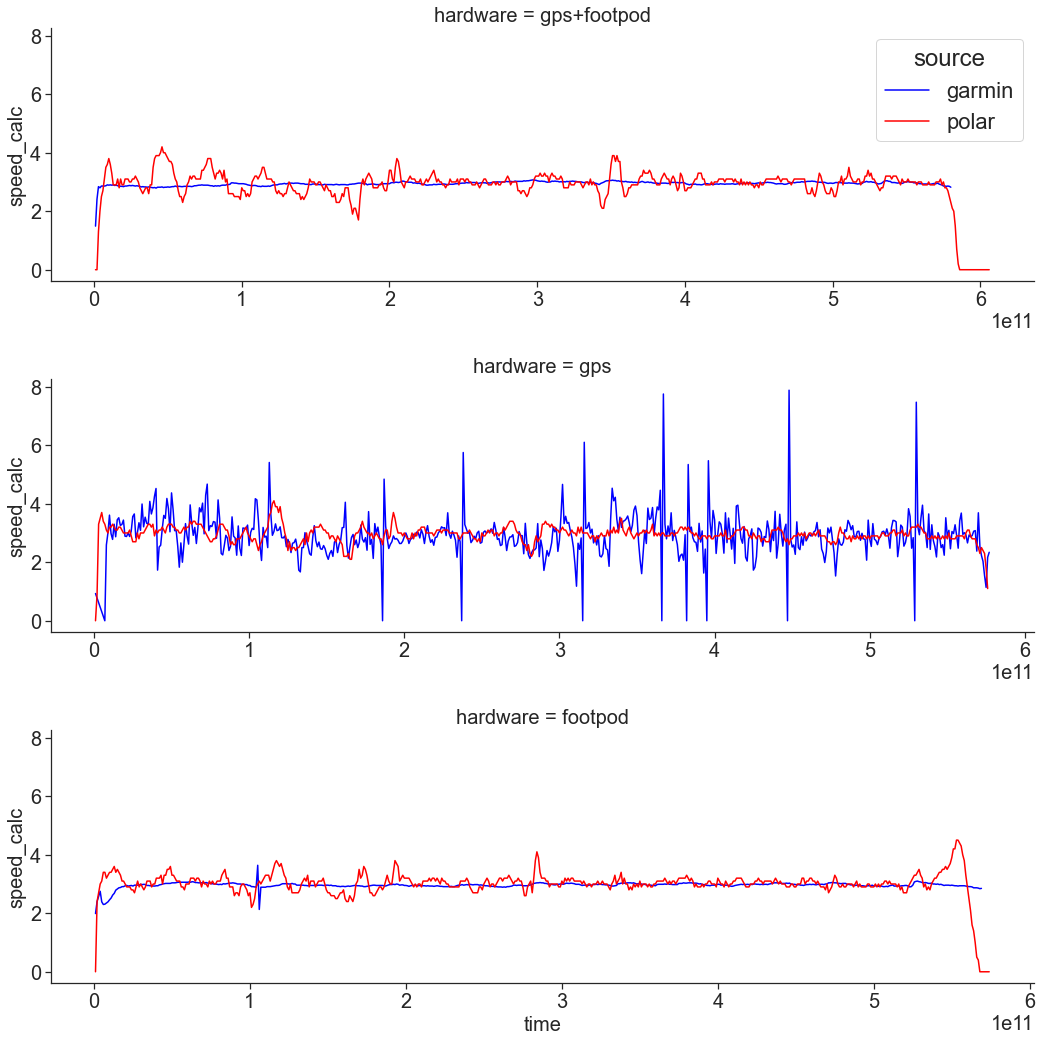

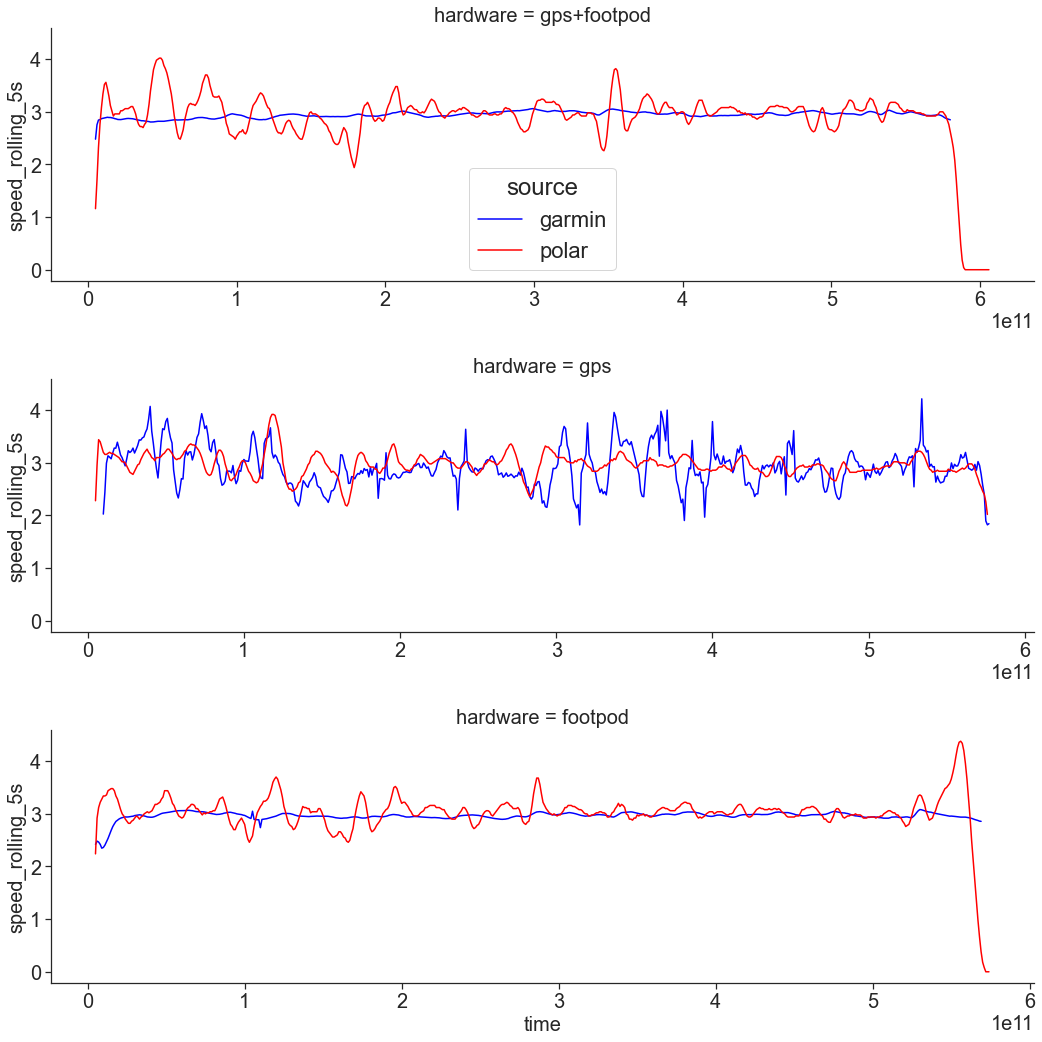

In [130]:
# fig, ax = plt.subplots(figsize=(16, 6))


def drawPlot(x='time', y='speed_calc'):
    g = sns.FacetGrid(concatenated,
                  row="hardware",
                  hue="source",
                  height=5,
                  aspect=3,
                  palette=['blue', 'red'],
                  legend_out=False,
                  sharex=False)
    g.map(sns.lineplot, x, y)
    g.add_legend()


print("Time vs speed")
drawPlot(x='time', y='speed_calc')

print("Time vs speed (smooth 5s window)")
drawPlot(x='time', y="speed_rolling_5s")

In [123]:
concatenated.describe()

,time,latitude,longitude,altitude,distance,hr,speed,d_distance,d_time,speed_calc,speed_rolling_5s,speed_rolling_10s,speed_rolling_15s,cadence
count,3486,2915.000000,2915.000000,3402.000000,3486.000000,1727.000000,1727.000000,3480.000000,3480,3477.000000,3441.000000,3396.000000,3351.000000,1759.000000
mean,0 days 00:04:50.746701090,52.130159,21.075167,112.574387,859.546813,152.616097,2.931735,2.934388,0 days 00:00:01.000574712,2.936920,2.946050,2.952436,2.956214,77.546902
std,0 days 00:02:47.762274020,0.001776,0.002194,12.142225,497.481226,8.895638,0.168748,0.493500,0 days 00:00:00.089710419,0.486121,0.360375,0.307818,0.264603,11.422636
min,0 days 00:00:00,52.127374,21.071322,95.400002,0.000000,87.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0 days 00:02:26,52.128396,21.073225,101.652000,431.657486,152.000000,2.902000,2.899902,0 days 00:00:01,2.899902,2.891992,2.900000,2.911997,79.000000
50%,0 days 00:04:51,52.130202,21.075085,110.491000,855.744995,154.000000,2.948000,2.970032,0 days 00:00:01,2.970032,2.964014,2.969000,2.971334,80.000000
75%,0 days 00:07:15.750000,52.131932,21.077200,119.800003,1290.167542,157.000000,2.995000,3.089966,0 days 00:00:01,3.089966,3.044000,3.040002,3.039998,80.000000
max,0 days 00:10:06,52.132908,21.078724,147.830000,1728.599976,161.000000,3.256000,7.880005,0 days 00:00:06,7.880005,4.379980,4.150000,3.946663,82.000000
